In [1]:
weather = '/home/vant/Escritorio/MasterDataScience/Clases/Python/weather_year.csv'

In [3]:
%%time
!cat {weather} |wc -l

367
CPU times: user 5.94 ms, sys: 255 µs, total: 6.2 ms
Wall time: 107 ms


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/vant/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
pd.options.display.max_columns=None

In [7]:
dfw = pd.read_csv(weather)
dfw.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22.0,0.00,0,NaN,202


In [8]:
dfw.shape
#366 dias y 23 columnas de informacion

(366, 23)

In [9]:
dfw.count()
#numero de datos por cada columna, solo en events hay NANs y parece que 1 en Max Gust SpeedMPH

EDT                           366
Max TemperatureF              366
Mean TemperatureF             366
Min TemperatureF              366
Max Dew PointF                366
MeanDew PointF                366
Min DewpointF                 366
Max Humidity                  366
 Mean Humidity                366
 Min Humidity                 366
 Max Sea Level PressureIn     366
 Mean Sea Level PressureIn    366
 Min Sea Level PressureIn     366
 Max VisibilityMiles          366
 Mean VisibilityMiles         366
 Min VisibilityMiles          366
 Max Wind SpeedMPH            366
 Mean Wind SpeedMPH           366
 Max Gust SpeedMPH            365
PrecipitationIn               366
 CloudCover                   366
 Events                       162
 WindDirDegrees               366
dtype: int64

In [10]:
dfw.dtypes
#alfanumericos (floats e integers)

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [27]:
#seleccionando las columnas más interesantes para analizar las diferencias entre min y max
dfw['DifTemp'] = dfw['Max TemperatureF']-dfw['Min TemperatureF']
dfw['DifHumid'] = dfw['Max Humidity']-dfw[' Min Humidity']
dfw['DifWind'] = dfw[' Max Wind SpeedMPH']-dfw[' Mean Wind SpeedMPH']
dfw.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,DifTemp,DifHumid,DifWind
0,2012-3-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17.0,0.00,0,NaN,138,32,48,7
1,2012-3-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32.0,T,1,Rain,163,37,50,15
2,2012-3-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36.0,0.03,6,Rain,190,18,29,10
3,2012-3-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24.0,0.00,0,NaN,242,26,55,11
4,2012-3-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22.0,0.00,0,NaN,202,36,51,10


In [36]:
dfw_dif = dfw[['EDT','DifTemp','DifHumid','DifWind']]
dfw_dif.head()

,EDT,DifTemp,DifHumid,DifWind
0,2012-3-10,32,48,7
1,2012-3-11,37,50,15
2,2012-3-12,18,29,10
3,2012-3-13,26,55,11
4,2012-3-14,36,51,10


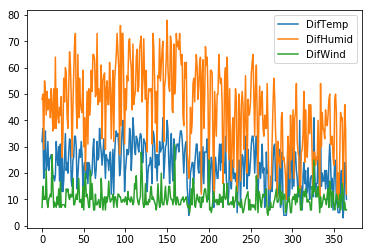

In [37]:
dfw_dif.plot();